<a href="https://colab.research.google.com/github/gshartnett/introAI/blob/main/lectures/Week_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Modern AI - Week 2 Notebook
Gavin Hartnett  
PRGS, Winter Quarter 2022

In [ ]:
##imports
import numpy as np
from numpy.random import default_rng
rng = default_rng(123)

import matplotlib
import matplotlib.pyplot as plt

## some commands to make the plots look nicer
plt.style.use('seaborn-white')

In [ ]:
## increase the font size
matplotlib.rcParams.update({'font.size': 18})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
## Perceptron

Plot the sign function and the logistic sigmoid. 

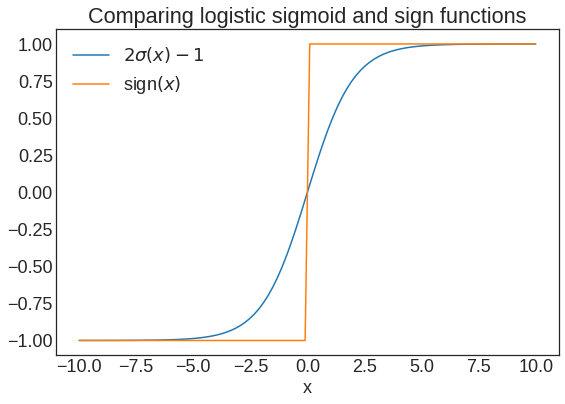

In [ ]:
def sigma(x):
    return (1 + np.exp(-x))**(-1)

x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, 2*sigma(x)-1, label=r'$2\sigma(x)-1$')
ax.plot(x, np.sign(x), label=r'sign$(x)$')
ax.set_title('Comparing logistic sigmoid and sign functions')
ax.set_xlabel(r'x')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/sigmoid_vs_sign.pdf')
plt.show()

## Gradient Descent

Let's consider the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function), which is widely used to test optimization algorithms:

$$ f(x, y) = (1-x)^2 + b (y-x^2)^2 \,, $$

where $b$ is a parameter, which we'll take to be 10. 

The gradient is

$$
\nabla f = 
\begin{bmatrix}
-2 (1-x) - 4 b x (y-x^2) \\
2b (y-x^2)
\end{bmatrix}
\,.
$$

The gradient vanishes for the single point $(x,y) = (1,1)$, which is also the global minimum. At this point the function takes on the value $f(1,1) = 0$. 

In [ ]:
b = 10

def f(x, y):
    '''The Rosenbrock function'''
    return (1-x)**2 + b*(y-x**2)**2

def dfdx(x, y):
    '''The x-derivative df/dx'''
    return -2*(1-x) - 4*b*x*(y-x**2)

def dfdy(x, y):
    '''The y-derivative df/dy'''
    return 2*b*(y-x**2)

Let's plot this. First, let's make a 3D plot of the surface. 

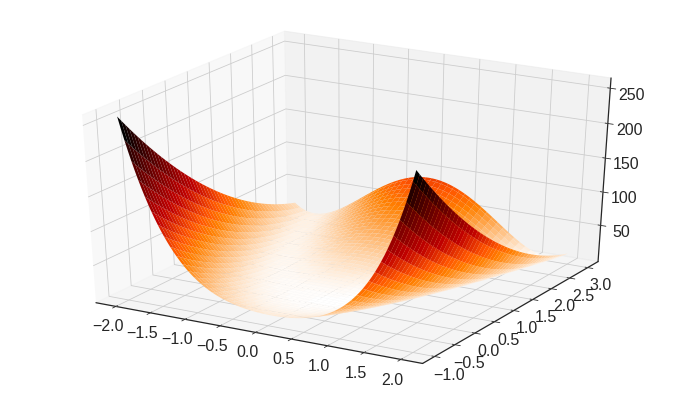

In [ ]:
# initialize figure 
fig = plt.figure(figsize=(12, 7))
ax = fig.gca(projection='3d')

# build the grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.gist_heat_r)
#fig.colorbar(surf, shrink=0.5, aspect=10)

plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/rosenbrock_3d.pdf')

plt.show()

Let's also make a contour plot.

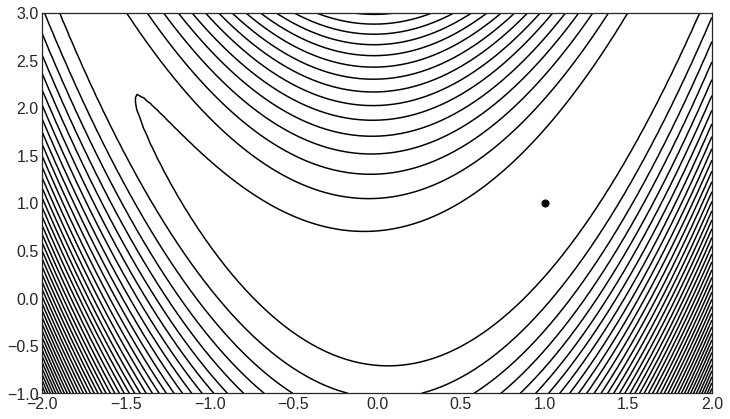

In [ ]:
fig = plt.figure(figsize=(12, 7))
contours = plt.contour(X, Y, Z, 50, colors='black')
plt.scatter(1, 1, color='k', s=50) # plot the minimum
plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/rosenbrock_contour.pdf')
plt.show()

Implement gradient descent

In [ ]:
nstep = 1000 #number of steps
lr = 0.01 #learning rate
x, y = 1.5, 0 #initial condition
trajectory = [(x, y, f(x,y))] #store visited values

## loop over steps
for i in range(nstep):
    
    ## compute the gradient
    gradfx = dfdx(x,y)
    gradfy = dfdy(x,y)

    ## update the position
    x = x - lr * gradfx
    y = y - lr * gradfy
    #print(x,y)

    ## record the new position
    trajectory.append((x, y, f(x,y)))

Let's plot the gradient descent trajectory

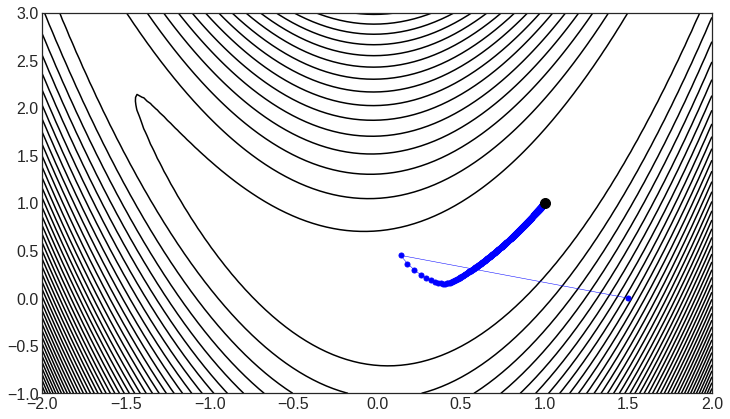

In [ ]:
fig = plt.figure(figsize=(12, 7))
contours = plt.contour(X, Y, Z, 50, colors='black')

## plot the points visited during the optimization
plt.plot([trajectory[i][0] for i in range(len(trajectory))],
            [trajectory[i][1] for i in range(len(trajectory))], 
            marker='o', markersize=5, color='blue', linewidth=0.5)

## plot the minimum
plt.plot([1], [1], marker='o', markersize=10, color='black', linewidth=0.5)

plt.savefig('/content/gdrive/MyDrive/Intro to AI/figures/rosenbrock_contour_gd.pdf')
plt.show()